In [2]:
import numpy as np
from matplotlib import pyplot as plt

## BUSCAR PARAMETRO DE DISTRIBUCION CON MAXIMUM LIKELIHOOD

#### 1. NORMAL

In [3]:
# --------------------- BUSCAR PARAMETRO DE DISTRIBUCION NORMAL ---------------------
N = 1000
mu_esp = 0
sigma_esp = 1
norms = np.random.normal(0, 1, size=N)

def find_best_param_norm(muestra, n):
    muestra = np.array(muestra)
    mu = sum(muestra)/n
    sigma = np.sqrt(sum((muestra - mu)**2)/n)
    
    return mu, sigma

mu_obs, sigma_obs = find_best_param_norm(norms, N)
print(f'La muestra debería tener mu = {mu_esp} y obtuvo: mu = {round(mu_obs, 2)}')
print(f'La muestra debería tener sigma = {sigma_esp} y obtuvo: sigma = {round(sigma_obs, 2)}')


La muestra debería tener mu = 0 y obtuvo: mu = 0.02
La muestra debería tener sigma = 1 y obtuvo: sigma = 1.0


#### 2. EJERCICIO LIBRO

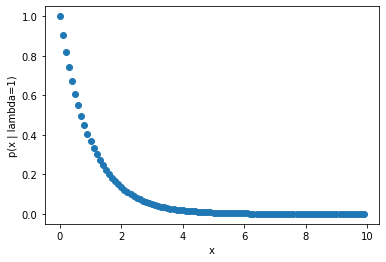

In [4]:
# --------------------- EJERCICIO LIBRO (PAG 55) ---------------------
# EJERCICIO 1:
# (a) 1. plot p(x|lamb) versus x, for lamb = 1
lamb = 1
expos = np.arange(0, 10, 0.1)

def p_expo(x, lam):
    proba = 0
    if x >= 0:
        proba = lam*np.exp(-lam*x)
    return proba

plt.figure()
plt.scatter(expos, np.array([p_expo(x, lamb) for x in expos]))
plt.title('')
plt.xlabel('x')
plt.ylabel('p(x | lambda=1)')
plt.show()
plt.close()

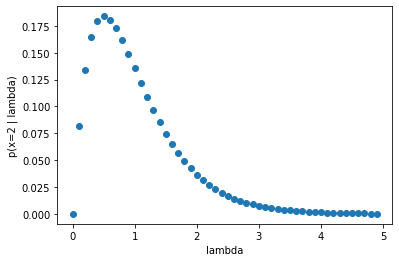

In [5]:
# 2. plot p(x|lam) versus lamb (0 <= lamb <= 5, for x = 2
x = 2
lambs = np.arange(0, 5, 0.1)

def p_expo(x, lam):
    proba = 0
    if x >= 0:
        proba = lam*np.exp(-lam*x)
    return proba

plt.figure()
plt.scatter(lambs, np.array([p_expo(2, l) for l in lambs]))
plt.xlabel('lambda')
plt.ylabel('p(x=2 | lambda)')
plt.show()
plt.close()

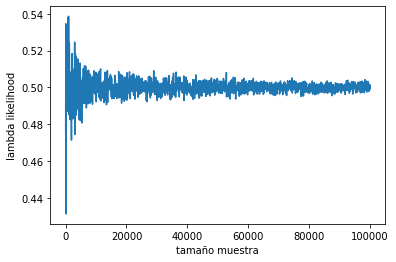

El valor de lambda que converge es: 0.4991417734170763


In [6]:
# (b) Hacer un gráfico de calcular el lambda 

def plot_lamb_like(lam):
    size_m = np.arange(50, 100000, 50)
    means = []

    plt.figure()
    for s in size_m:
        means.append(1/np.mean(np.random.exponential(lam, s)))
    plt.plot(size_m, means)
    #plt.xticks(ticks=np.log10([1, 10, 100]), labels=[1, 10, 100])
    plt.xlabel('tamaño muestra')
    plt.ylabel('lambda likelihood')
    plt.show()
    plt.close()

plot_lamb_like(2)

lam_converge = 1 / np.mean(np.random.exponential(2, 100000))
print(f"El valor de lambda que converge es: {lam_converge}")

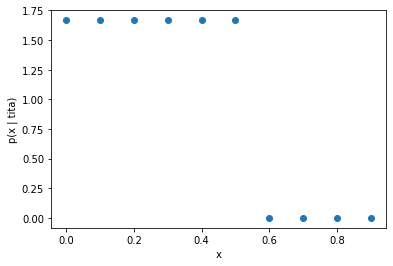

In [7]:
# EJERCICO 2:
# (b) 
unif_rand = np.arange(0, 1, 0.1)
unif_max = 0.6
def p_unif(unif_max, x):
    tita = 1/unif_max
    if x < 0 or x > 0.6:
        return 0
    return tita

plt.figure()
plt.scatter(unif_rand, np.array([p_unif(unif_max, u) for u in unif_rand]))
plt.title('')
plt.xlabel('x')
plt.ylabel('p(x | tita)')
plt.show()
plt.close()



$$
\text{Eponenciales: } 
\\
P(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda) \quad (\text{por independencia de los arribos, esto mirando el tp1})
\\
\text{Con Likelihood: }
L(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda)
\\

\text{buscamos } \lambda \text{ que mejore el ajuste}
\\

1. L(x_1, x_2 , \ldots, \lambda) = \lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}
= \lambda^n e^{-\lambda} \left(\sum_{i=1}^{n} x_i\right)
\\

2. \log(L) = \log(\lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}) = n \log(\lambda) - \lambda \sum_{i=1}^{n} x_i
\\

3. \text{Maximizar } \rightarrow \text{encontrar } \lambda \left(\frac{dL}{d\lambda}\right)_{\lambda}
\\
\frac{dL}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0 \quad \rightarrow \quad \frac{n}{\lambda} = \sum_{i=1}^{n} x_i
\\
\lambda = \frac{n}{\sum_{i=1}^{n} x_i} 
\text{se calcula como la esperanza de la expo } \frac{1}{\text{prom}}
\\
\text{Si se calcula } x_{n+1} \text{ solo tengo que } 
\lambda = \frac{n+1}{\sum_{i=1}^{n+1} x_i} \quad \rightarrow \quad \frac{1}{\lambda} = \frac{\sum_{i=1}^{n+1} x_i}{n+1}
$$


$$
\text{Poisson: ARREGLAR } 
\\
P(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda) \quad (\text{por independencia de los arribos, esto mirando el tp1})
\\
\text{Con Likelihood: }
L(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda)
\\

\text{buscamos } \lambda \text{ que mejore el ajuste}
\\

1. L(x_1, x_2 , \ldots, \lambda) = \lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}
= \lambda^n e^{-\lambda} \left(\sum_{i=1}^{n} x_i\right)
\\

2. \log(L) = \log(\lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}) = n \log(\lambda) - \lambda \sum_{i=1}^{n} x_i
\\

3. \text{Maximizar } \rightarrow \text{encontrar } \lambda \left(\frac{dL}{d\lambda}\right)_{\lambda}
\\
\frac{dL}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0 \quad \rightarrow \quad \frac{n}{\lambda} = \sum_{i=1}^{n} x_i
\\
\lambda = \frac{n}{\sum_{i=1}^{n} x_i} 
\text{se calcula como la esperanza de la expo } \frac{1}{\text{prom}}
\\
\text{Si se calcula } x_{n+1} \text{ solo tengo que } 
\lambda = \frac{n+1}{\sum_{i=1}^{n+1} x_i} \quad \rightarrow \quad \frac{1}{\lambda} = \frac{\sum_{i=1}^{n+1} x_i}{n+1}

$$
\text{Normal: ARREGLAR } 
\\
P(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda) \quad (\text{por independencia de los arribos, esto mirando el tp1})
\\
\text{Con Likelihood: }
L(x_1, x_2 , \ldots, \lambda) = P(x_1 \mid \lambda) \cdot \ldots \cdot P(x_n \mid \lambda)
\\

\text{buscamos } \lambda \text{ que mejore el ajuste}
\\

1. L(x_1, x_2 , \ldots, \lambda) = \lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}
= \lambda^n e^{-\lambda} \left(\sum_{i=1}^{n} x_i\right)
\\

2. \log(L) = \log(\lambda^n e^{-\lambda (\sum_{i=1}^{n} x_i)}) = n \log(\lambda) - \lambda \sum_{i=1}^{n} x_i
\\

3. \text{Maximizar } \rightarrow \text{encontrar } \lambda \left(\frac{dL}{d\lambda}\right)_{\lambda}
\\
\frac{dL}{d\lambda} = \frac{n}{\lambda} - \sum_{i=1}^{n} x_i = 0 \quad \rightarrow \quad \frac{n}{\lambda} = \sum_{i=1}^{n} x_i
\\
\lambda = \frac{n}{\sum_{i=1}^{n} x_i} 
\text{se calcula como la esperanza de la expo } \frac{1}{\text{prom}}
\\
\text{Si se calcula } x_{n+1} \text{ solo tengo que } 
\lambda = \frac{n+1}{\sum_{i=1}^{n+1} x_i} \quad \rightarrow \quad \frac{1}{\lambda} = \frac{\sum_{i=1}^{n+1} x_i}{n+1}